<a href="https://colab.research.google.com/github/Pavalya-Periyasamy05/Machine-Learning-and-AI/blob/main/Bioactivity_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR Model Building of KRAS GTPase protein inhibitor**

### Building a machine learning model using the ChEMBL bioactivity data

## **Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# **Load the data**

### The dataset is based on PubChem fingerprints, which capture local molecular features derived from the connectivity of Lego-like building blocks, rather than global properties like Lipinski descriptors.

In [2]:
dataset = pd.read_csv("Bioactivity_data_3class_pIC50_pubchem_fp.csv")
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.809668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.920819
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.638272
2747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.455932
2748,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.275724
2749,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.853872


## **Input features**

### This bioactivity dataset consists of 881 input features and one output variable (pIC50). The unique molecular fingerprints of each compound enable the machine learning algorithm to learn distinctive molecular characteristics and patterns. A predictive model is developed to differentiate between active and inactive compounds. The primary objective is to identify key functional groups or fingerprint features that contribute to the design of potent drug candidates. The target variable used for prediction is pIC50, which is the negative logarithmic transformation of the IC50 value, where IC50 represents the concentration required to inhibit 50% of biological activity.

In [3]:
X = dataset.drop(["pIC50"], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2748,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2749,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Output features**

In [4]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,3.809668
1,5.920819
2,5.000000
3,5.744727
4,6.698970
...,...
2746,5.638272
2747,5.455932
2748,5.275724
2749,5.853872


In [5]:
X.shape

(2751, 881)

In [6]:
Y.shape

(2751,)

## **Remove low variance features**

### If a feature has almost the same value for all compounds, it does not help distinguish active vs inactive compounds

### Allow us to build the model much quicker

In [7]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold =0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  return input_data[input_data.columns[selection.get_support(indices= True)]]

X = remove_low_variance(X, threshold=0.1)
X


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP13,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP23,PubchemFP24,...,PubchemFP777,PubchemFP779,PubchemFP792,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP801,PubchemFP818,PubchemFP821,PubchemFP822
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
3,1,1,0,1,1,1,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,1,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
2747,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
2748,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
2749,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1


In [8]:
X.to_csv("descriptor_list.csv", index=False)
# First row contains the names of the fingerprints (203 columns)

### In the app, will use the following to get this same descriptor list of 203 X variables from the initial set of 881 X variables
### Xlist = list(pd.read_csv("descriptor_list.csv").columns)
### X[Xlist]

## **Random Forest Regression Model**

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9202992686115987

## **Model Prediction**

In [11]:
# Trained model prediction
Y_pred = model.predict(X)
Y_pred

array([4.53522675, 6.18106884, 5.33729848, ..., 5.5857207 , 6.10908133,
       5.99897226])

## **Model Performance**

In [12]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.13
Coefficient of determination (R^2): 0.92


## **Data Visualization (Experimental vs Predicted pIC50 for Training Data)**

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

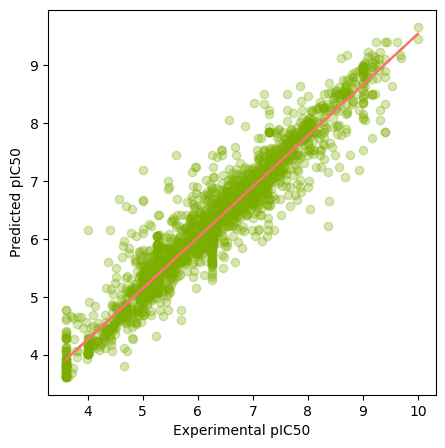

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

## **Save Model as Pickle Object**

In [15]:
import pickle

In [17]:
pickle.dump(model, open('KRAS_GTPase_protein_inhibitor.pkl', 'wb'))